In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pickle

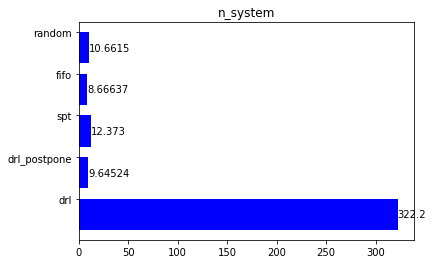

ppo 9.6 (0.42)
svfa 9.0 (0.26)
spt 12.4 (0.71)
fifo 8.7 (0.33)
random 10.7 (0.45)


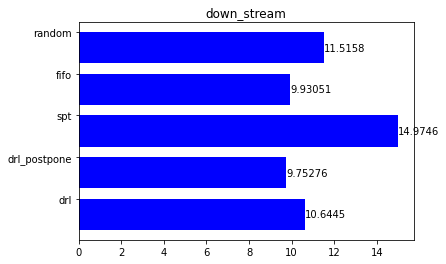

ppo 9.8 (0.31)
svfa 11.3 (0.37)
spt 15.0 (0.54)
fifo 9.9 (0.33)
random 11.5 (0.41)


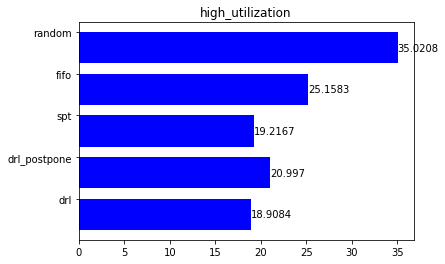

ppo 21.0 (1.22)
svfa 21.5 (1.39)
spt 19.2 (0.88)
fifo 25.2 (2.2)
random 35.0 (3.62)


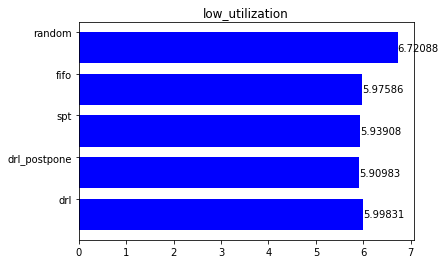

ppo 5.9 (0.14)
svfa 5.9 (0.11)
spt 5.9 (0.1)
fifo 6.0 (0.1)
random 6.7 (0.12)


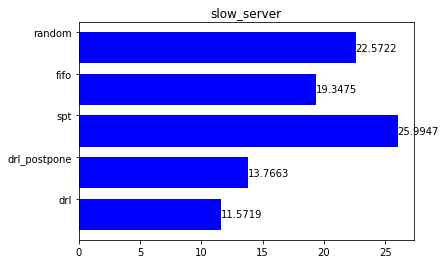

ppo 13.8 (1.2)
svfa 15.3 (0.71)
spt 26.0 (1.79)
fifo 19.3 (1.36)
random 22.6 (1.59)


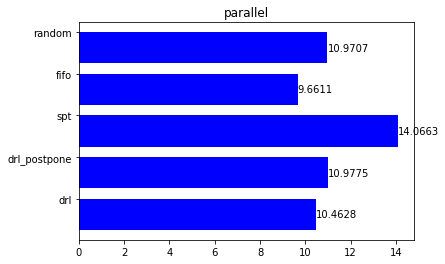

ppo 11.0 (0.61)
svfa 12.5 (0.48)
spt 14.1 (0.55)
fifo 9.7 (0.35)
random 11.0 (0.37)


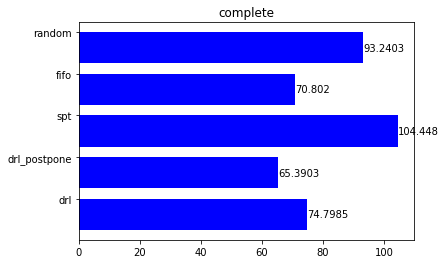

ppo 65.4 (1.79)
svfa 73.4 (2.27)
spt 104.4 (4.71)
fifo 70.8 (3.36)
random 93.2 (5.49)


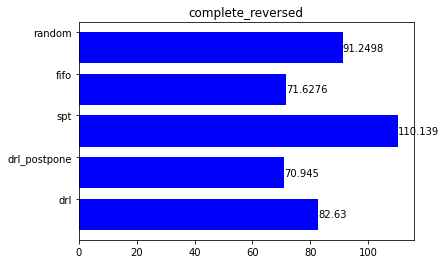

ppo 70.9 (2.14)
svfa 77.9 (2.71)
spt 110.1 (4.98)
fifo 71.6 (2.72)
random 91.2 (4.43)


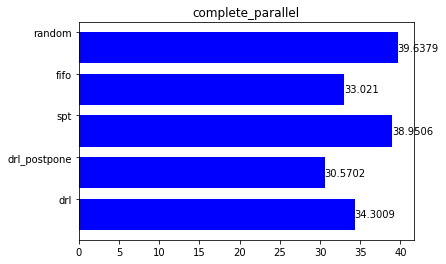

ppo 30.6 (1.93)
svfa 73.4 (2.27)
spt 39.0 (2.7)
fifo 33.0 (2.75)
random 39.6 (2.69)


In [4]:
for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')['mean_cycle_time']
    drl_penalty = pd.read_csv(f'results/PPOPlanner_{model_name}_penalty.txt')['mean_cycle_time']
    with open(f'results_svfa/{model_name}', 'rb') as f:
        svfa = pickle.load(f)
    spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
    fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
    random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']
    
    labels = ['drl', 'drl_postpone', 'spt', 'fifo', 'random']
    data = [drl.mean(), drl_penalty.mean(), spt.mean(), fifo.mean(), random.mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)  
    plt.show()

    print('ppo', f'{np.round(np.mean(drl_penalty),1)} ({np.round(1.96*(np.std(drl_penalty)/np.sqrt(len(drl_penalty))),2)})')
    print('svfa', f'{np.round(np.mean(svfa),1)} ({np.round(1.96*(np.std(svfa)/np.sqrt(len(svfa))),2)})')
    print('spt', f'{np.round(np.mean(spt),1)} ({np.round(1.96*(np.std(spt)/np.sqrt(len(spt))),2)})')
    print('fifo', f'{np.round(np.mean(fifo),1)} ({np.round(1.96*(np.std(fifo)/np.sqrt(len(fifo))),2)})')
    print('random', f'{np.round(np.mean(random),1)} ({np.round(1.96*(np.std(random)/np.sqrt(len(random))),2)})')  
    #plt.show()






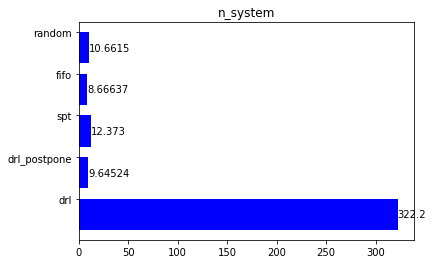

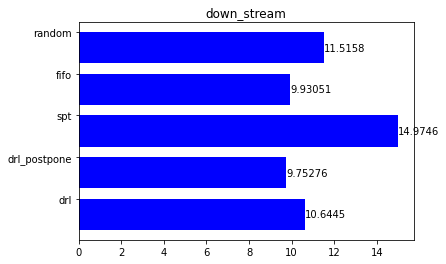

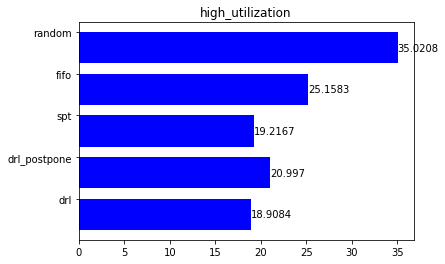

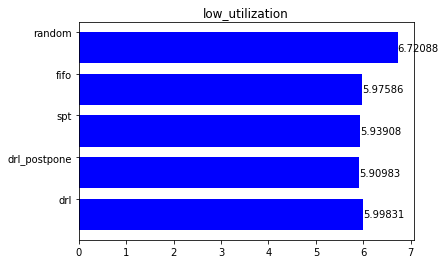

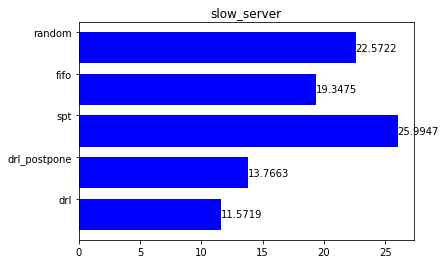

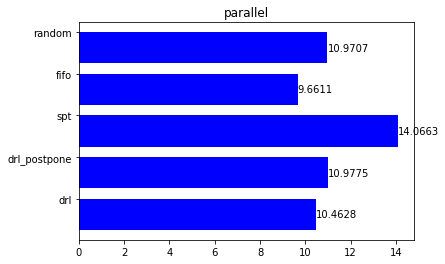

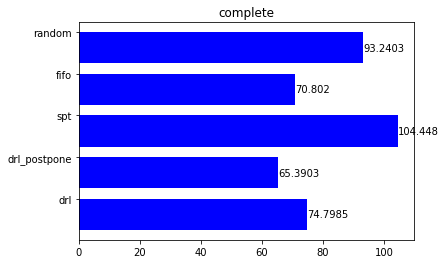

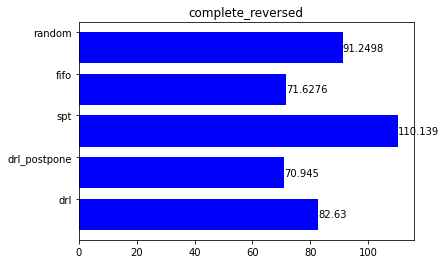

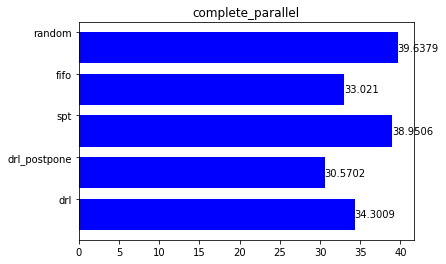

In [5]:
for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')
    drl_penalty = pd.read_csv(f'results/PPOPlanner_{model_name}_penalty.txt')
    spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')
    fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')
    random = pd.read_csv(f'results/Random_{model_name}.txt')
    
    labels = ['drl', 'drl_postpone', 'spt', 'fifo', 'random']
    data = [drl['mean_cycle_time'].mean(), drl_penalty['mean_cycle_time'].mean(), spt['mean_cycle_time'].mean(), fifo['mean_cycle_time'].mean(), random['mean_cycle_time'].mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)      
    #plt.show()

In [8]:
from scipy import stats
#for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:

model_name = 'complete_parallel'
drl = pd.read_csv(f'results/PPOPlanner_{model_name}_penalty.txt')['mean_cycle_time']
with open(f'results_svfa/{model_name}', 'rb') as f:
    svfa = pickle.load(f)
spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']

stats.ttest_ind(drl, fifo)  

Ttest_indResult(statistic=-1.4233150044173675, pvalue=0.15621864272106434)